Importando os pacotes

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [24]:
#Leitura do dataset
carros = pd.read_csv('carprices.csv')

In [25]:
carros.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
carros.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Análise de correlção

In [27]:
#seleciona variaveis numericas
num_carros = carros.select_dtypes(include=['float64', 'int64'])

#calcula a matriz de correlação
corr = num_carros.corr()

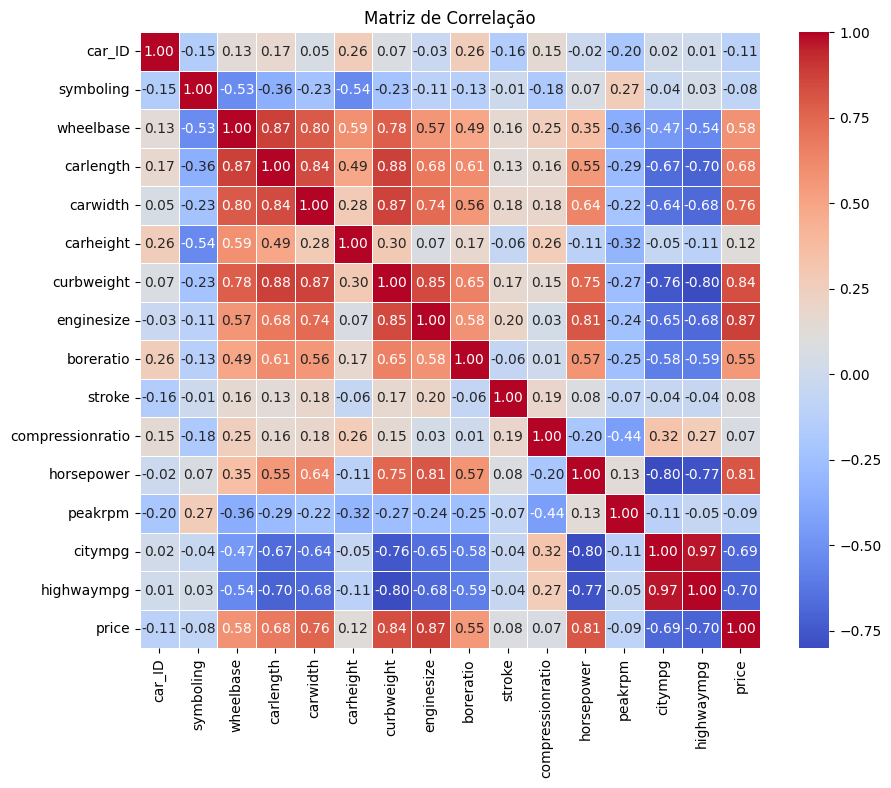

In [28]:
#plot
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

Analise dos gráficos de dispersão

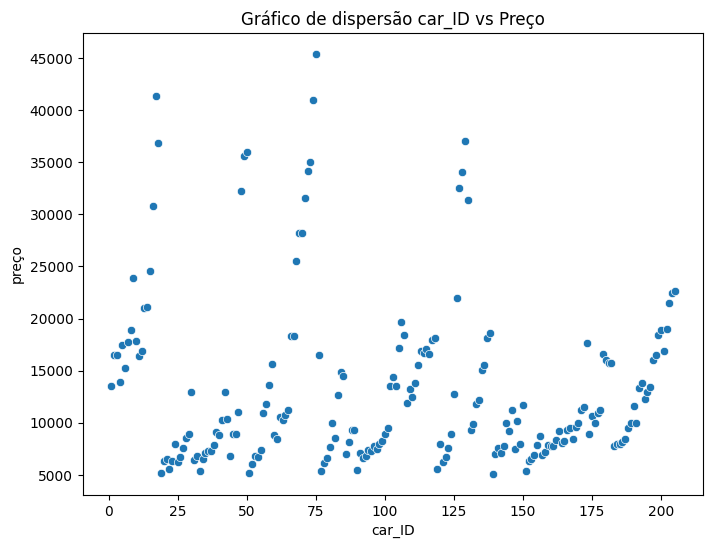

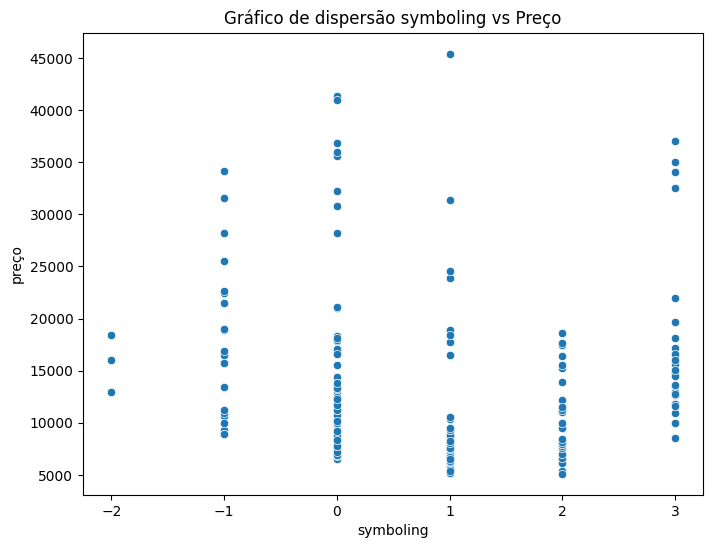

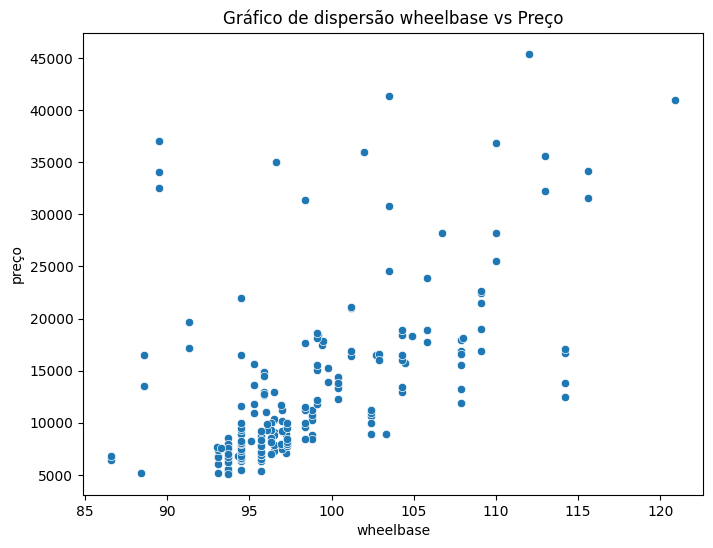

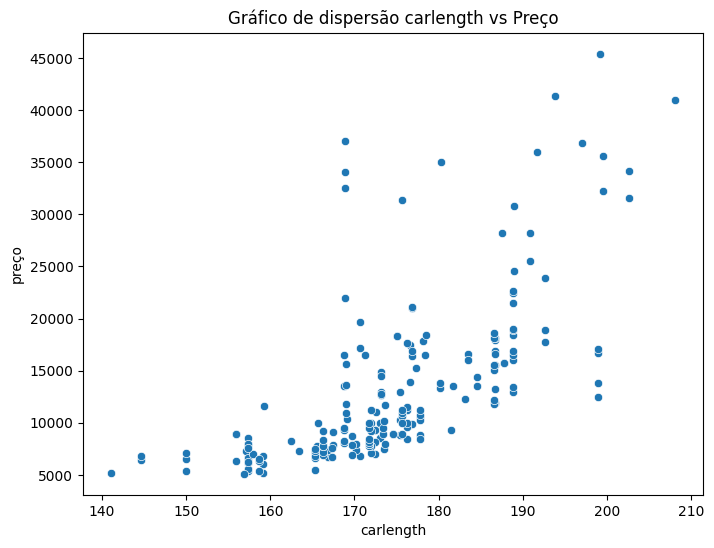

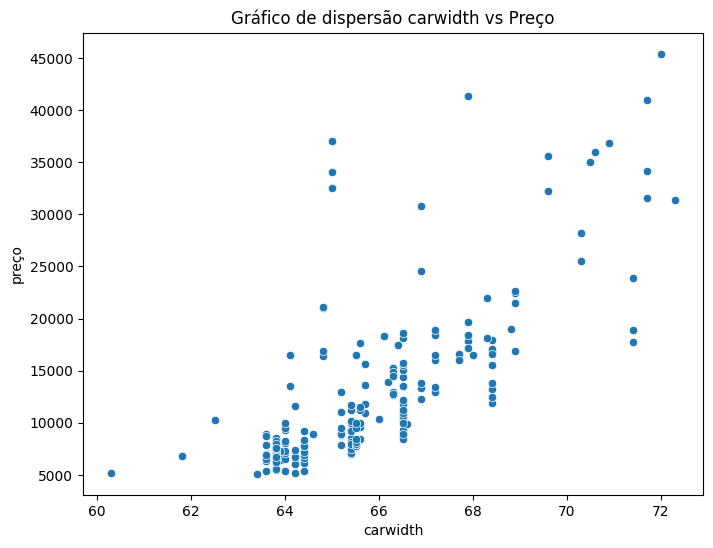

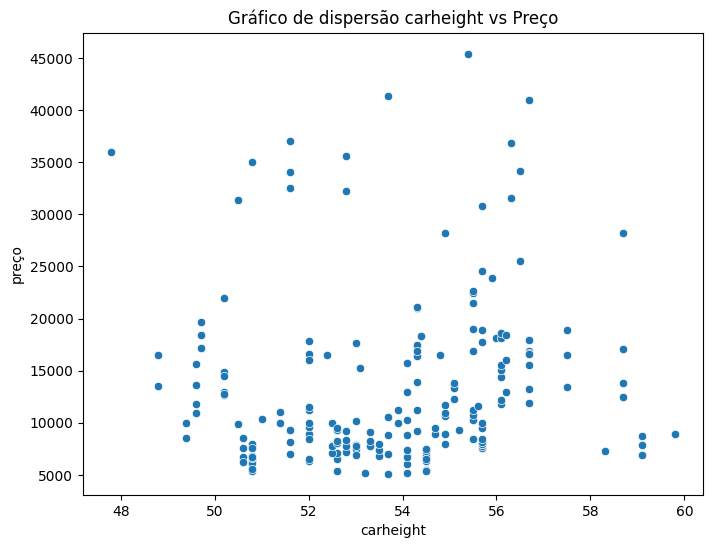

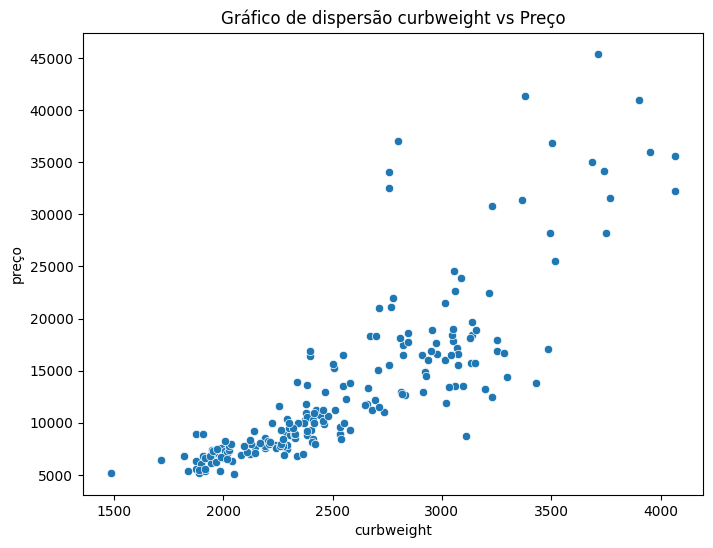

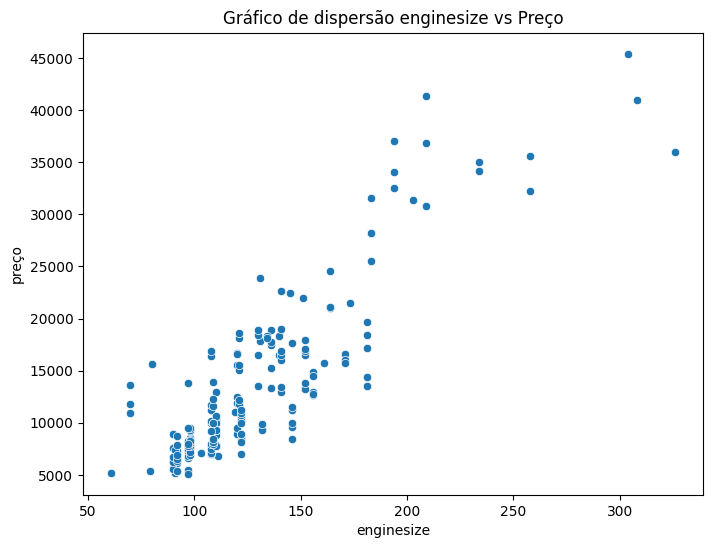

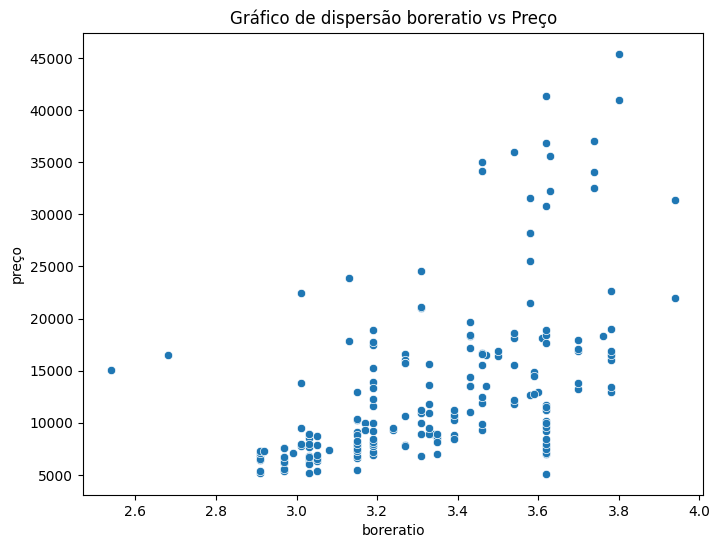

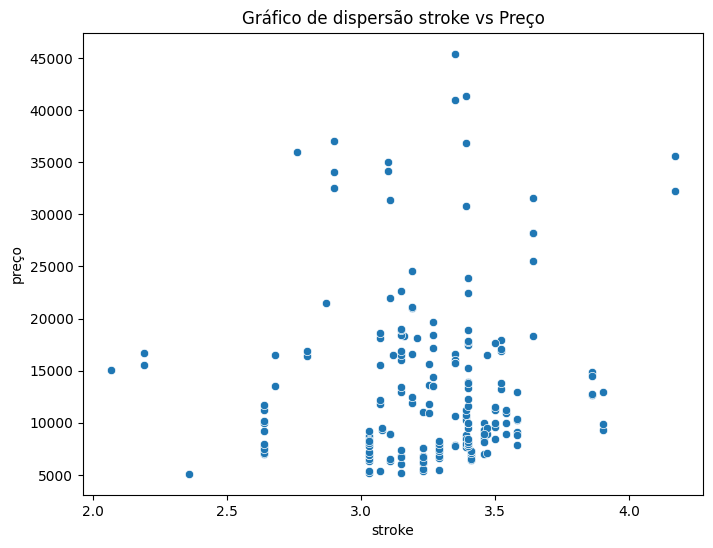

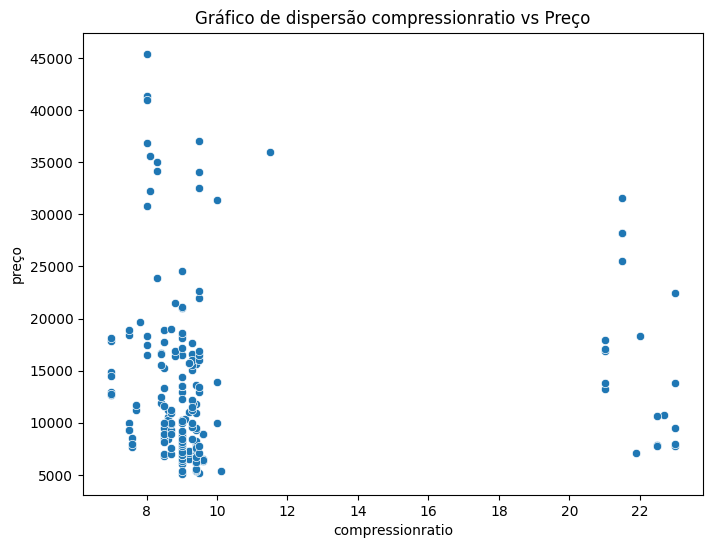

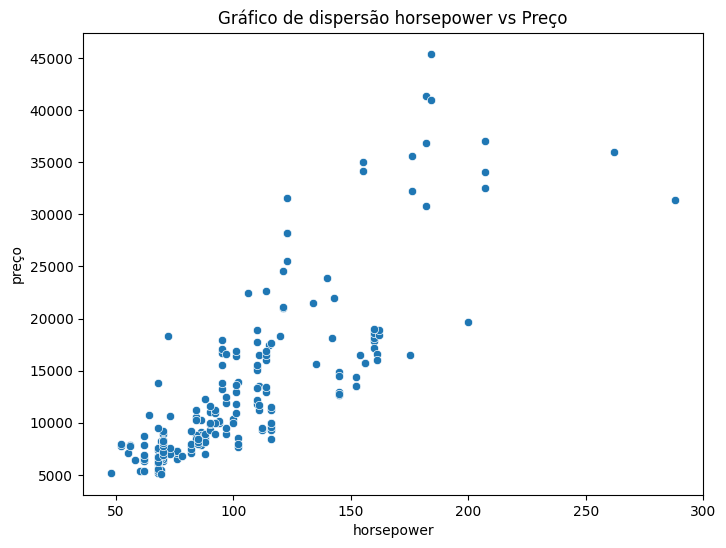

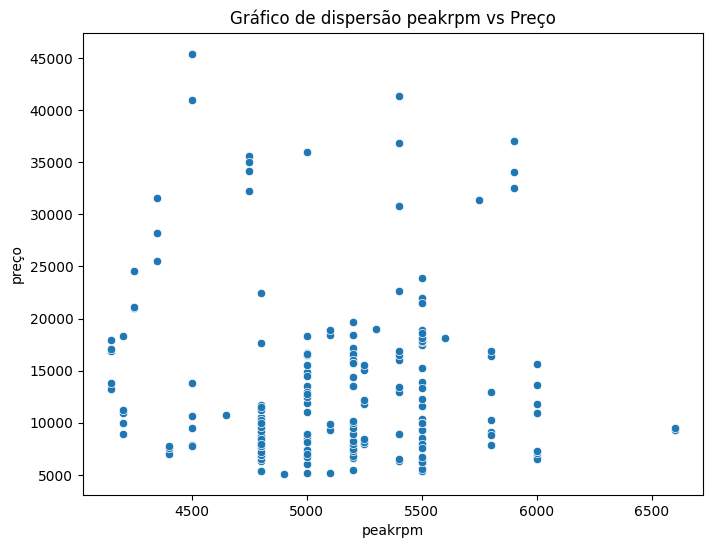

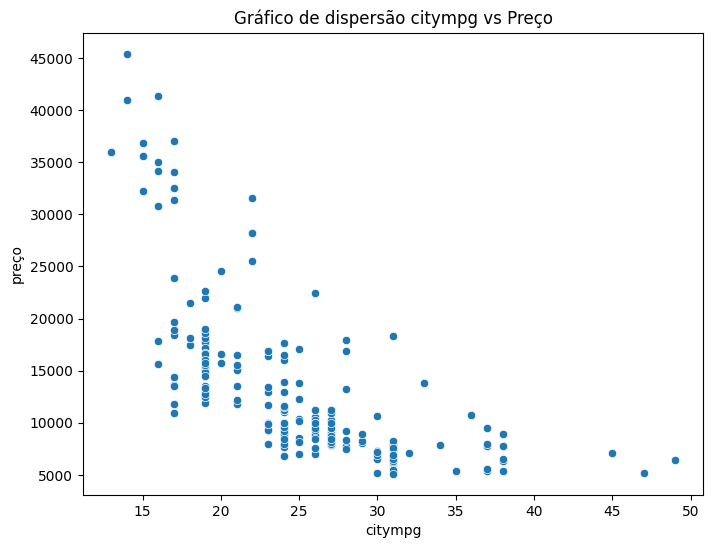

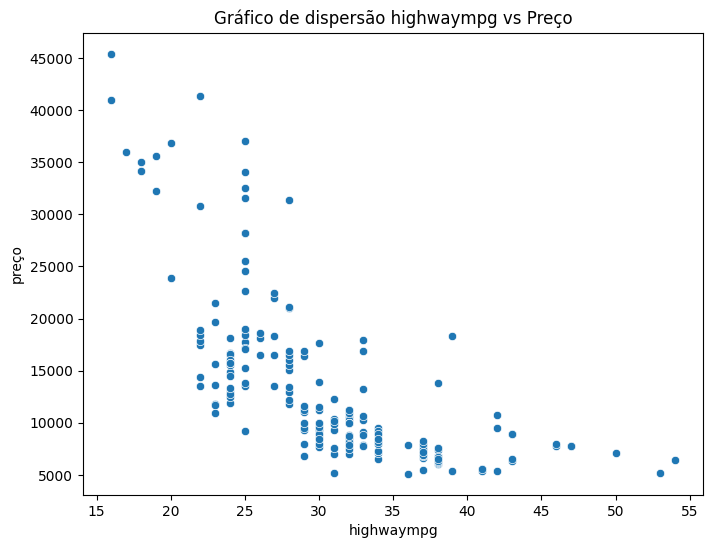

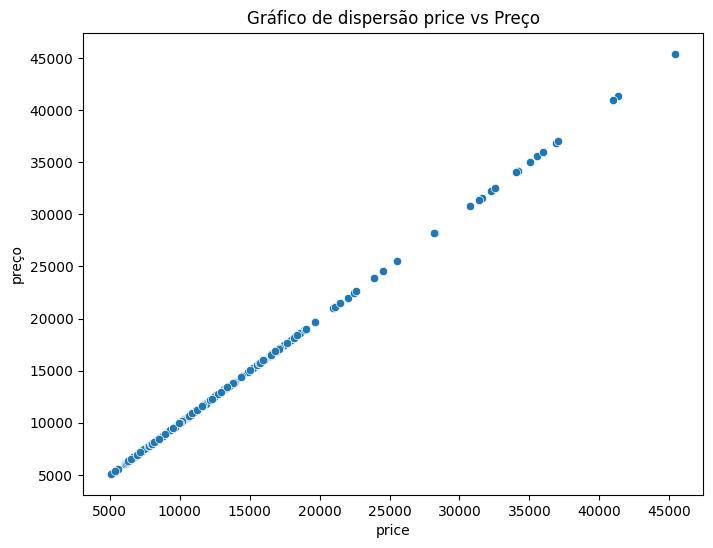

In [29]:
#iterando em todas as colunas numéricas

for column in num_carros.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=num_carros, x=column, y='price')
    plt.title(f'Gráfico de dispersão {column} vs Preço')
    plt.xlabel(column)
    plt.ylabel('preço')
    plt.show()

Pode ser notado que algumas variáveis parecem ter uma relação bem linear com o preço. 

Regressão linear simples: Preço X Enginesize
- Vai ser considerado uma regressão linear simples de preço e engine size. Variáveis com correlação de 0.86 pela matriz e gráfico de dispersão promissor

In [30]:
!pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [31]:
#importa o pacote
import statsmodels.api as sm

#define a variável explicativa e adiciona uma constante
x = sm.add_constant(num_carros['enginesize'])

#define a variável de interesse
y = num_carros['price']

In [32]:
#fit do modelo: aqui o python irá calcular os valores de intercepto e coeficiente angular estimados
model = sm.OLS(y, X).fit()

In [33]:
#gera a tabela de regressão
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     227.4
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           3.15e-73
Time:                        19:47:29   Log-Likelihood:                -1956.8
No. Observations:                 205   AIC:                             3924.
Df Residuals:                     200   BIC:                             3940.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.623e+04   1.28e+04     -3.610      0.0

O modelo estimado foi:

Preço do carro = -8005.4455 + 167.6984 * (tamanho do carro)

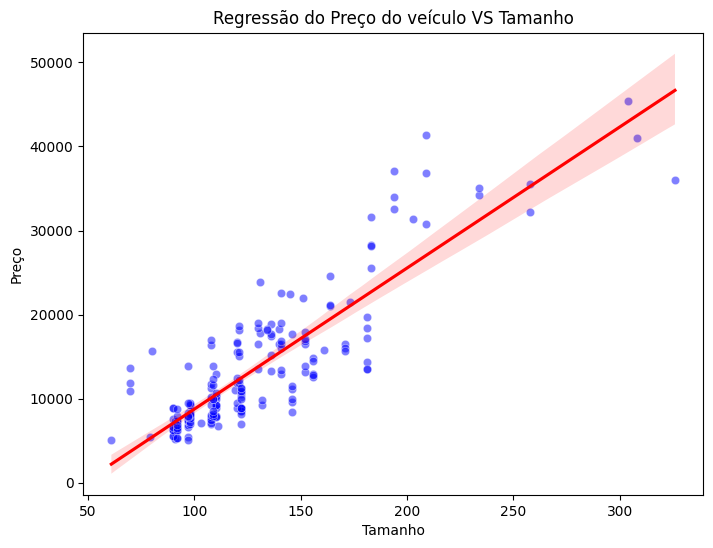

In [34]:
#gerando o gráfico da reta estimada

plt.figure(figsize=(8,6))
sns.scatterplot(data=num_carros, x='enginesize', y='price', color='blue', alpha=0.5)

#a função regplot gera a regressão e o plot da reta
sns.regplot(data=num_carros, x='enginesize', y = 'price', scatter = False, color = 'red')

#definindo titulos
plt.title('Regressão do Preço do veículo VS Tamanho')
plt.xlabel('Tamanho')
plt.ylabel('Preço')

plt.show()

Analisando os resíduos do modelo:

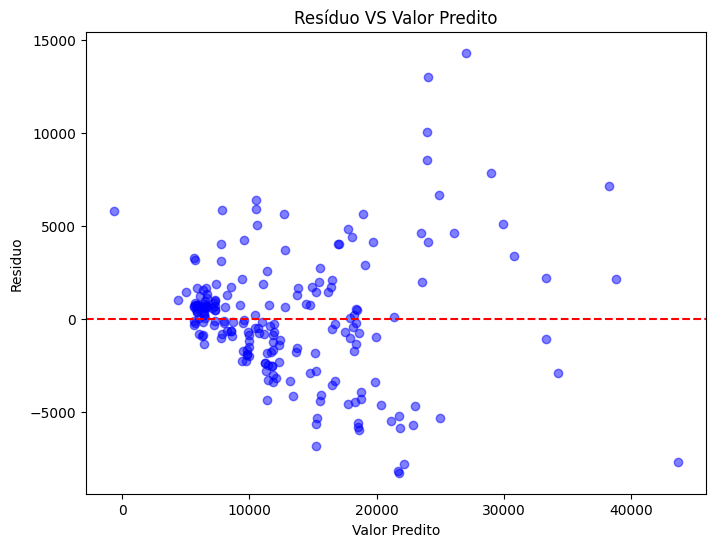

In [35]:
#salva o dado do resíduo
residuals = model.resid

#calcula o valor predito
predicted_values = model.fittedvalues

plt.figure(figsize=(8,6))
plt.scatter(predicted_values, residuals, color ='blue', alpha = 0.5)

#adiciona linha
plt.axhline(y=0, color = 'red', linestyle='--')

#titulos
plt.title('Resíduo VS Valor Predito')
plt.xlabel("Valor Predito")
plt.ylabel('Residuo')

plt.show()


Regressão Multipla 

Construção de um modelo de regressão multipla

Para isso, deve ser considerado variáveis numéricas de correlação forte

In [36]:
#Seleciona variáveis com correlação elevada
high_correlation_variables = corr[(corr['price'] > 0.7) | (corr['price']< -0.7)].index.tolist()
high_correlation_variables.remove('price')

#variáveis selecionadas
selected_variables = ['price'] + high_correlation_variables
selected_df = num_carros[selected_variables]

In [37]:
#Fit do modelo
x = sm.add_constant(selected_df.drop(columns=['price']))
y = selected_df['price']
model = sm.OLS(y, X).fit()

#print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     227.4
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           3.15e-73
Time:                        19:47:30   Log-Likelihood:                -1956.8
No. Observations:                 205   AIC:                             3924.
Df Residuals:                     200   BIC:                             3940.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.623e+04   1.28e+04     -3.610      0.0

Vemos que a variável curbweight não tem p-valor menor que 0.05. Assim, vamos retirá-la do modelo. Esse processo pode ser feito iterativamente, até se manter variáveis significativas

In [38]:
high_correlation_variables.remove('curbweight')

#variáveis selecionadas
selected_variables = ['price'] + high_correlation_variables
selected_df = num_carros[selected_variables]

In [39]:
#fit do modelo atualizado
x = sm.add_constant(selected_df.drop(columns=['price']))
y = selected_df['price']
model = sm.OLS(y, x).fit()

#print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     298.9
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           8.26e-74
Time:                        19:48:57   Log-Likelihood:                -1958.5
No. Observations:                 205   AIC:                             3925.
Df Residuals:                     201   BIC:                             3938.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.021e+04   1.02e+04     -5.889      0.0

O modelo estimado foi:

Preço do carro =  -6.021e+04 + 848.69(largura do carro) + 94.94(tamanho do carro) + 52.8026*(potencia do carro)

Análise dos resíduos

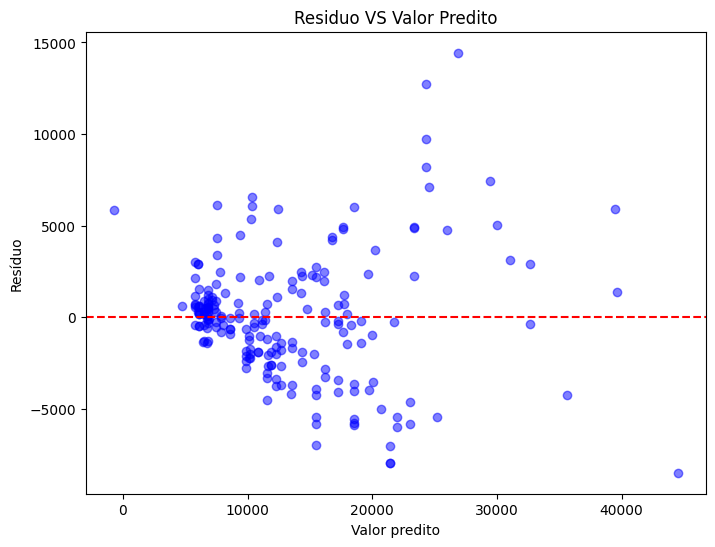

In [40]:
#salva o dado do resíduo
residuals = model.resid

#calcula ovalor predito
predicted_values = model.fittedvalues

plt.figure(figsize=(8,6))
plt.scatter(predicted_values, residuals, color = 'blue', alpha = 0.5)

#adiciona linha
plt.axhline(y=0, color='red', linestyle='--')

#titulos
plt.title('Residuo VS Valor Predito')
plt.xlabel('Valor predito')
plt.ylabel('Resíduo')

plt.show()